In [1]:
import pyqsp
from pyqsp.LPoly import *
from pyqsp.gadgets import *
import jax
import jax.numpy as jnp
import numpy as np
from tqdm.notebook import tqdm
from scipy.interpolate import approximate_taylor_polynomial
from matplotlib import pyplot as plt
import copy

np.set_printoptions(linewidth=100000)

In [2]:
Xi_1 = [np.array([0, -np.pi/3, np.pi/3, 0])]
S_1 = [[0, 1, 0]]
G = AtomicGadget(Xi_1, S_1, label="G")

Xi_2 = np.array([[0, np.pi/3, -np.pi/3, 0]])
S_2 = [[1, 0, 1]]
G_tilde = AtomicGadget(Xi_2, S_2, label="G_tilde")

In [3]:
G.get_qsp_unitary(('G', 0))({('G', 0):0.1, ('G', 1):0.1})

array([[ 0.001    +1.38777878e-17j, -0.8616844-5.07443593e-01j],
       [ 0.8616844-5.07443593e-01j,  0.001    -1.38777878e-17j]])

In [12]:
# Performs an interlink of the G gadget with the extraction gadget. Note that deg is the 
# degree of the polynomial used in the correction. If it were instead "None" no correction
# would be applied
deg = 29

G_interlink = G.interlink(G_tilde, [
    (('G', 0), ('G_tilde', 0), deg)
])

In [15]:
G_interlink.get_sequence(('G_tilde', 0))[3].matrix({

In [5]:
# Sets gadget leg inputs
F = lambda x : {("G", 0): x, ("G", 1): 0.5, ("G_tilde", 1): 0.5}

In [6]:
# Gets the sequence of a leg of the gadget interlink
fn = lambda x : G_interlink.get_qsp_unitary(('G_tilde', 0))(F(x))[0][0]

In [7]:
# Plots the gadget interlink
data = [fn(x) for x in tqdm(np.linspace(-1, 1, 200))]

  0%|          | 0/200 [00:00<?, ?it/s]

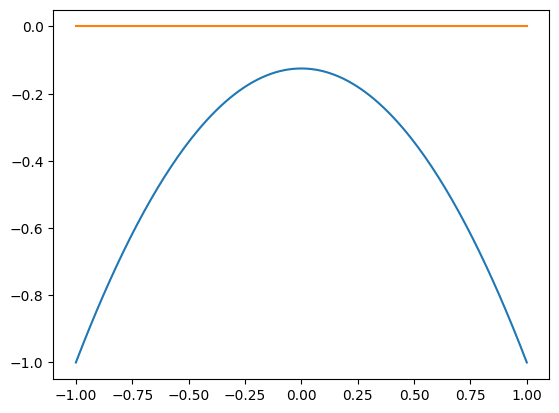

In [8]:
plt.plot(np.linspace(-1, 1, 200), np.real(data))
plt.plot(np.linspace(-1, 1, 200), np.imag(data))

In [9]:
f = lambda x, y : G.get_qsp_unitary(('G', 0))({('G', 0) : x, ('G', 1) : y})[0][0]
g = lambda x, y : G_tilde.get_qsp_unitary(('G_tilde', 0))({('G_tilde', 0) : x, ('G_tilde', 1) : y})[0][0]

In [10]:
h = lambda x : g(f(x, 0.5), 0.5)

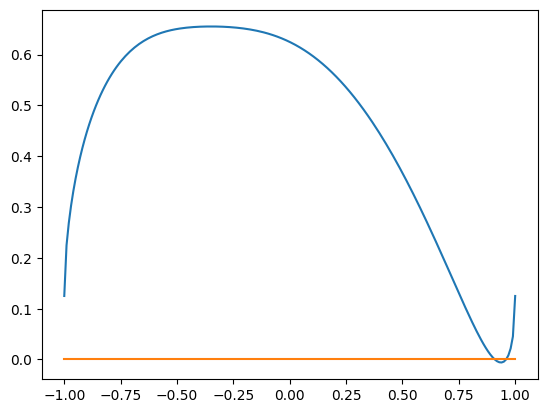

In [11]:
plt.plot(np.linspace(-1, 1, 200), [np.real(h(x)) for x in np.linspace(-1, 1, 200)])
plt.plot(np.linspace(-1, 1, 200), [np.imag(h(x)) for x in np.linspace(-1, 1, 200)])